# TikTok trending prediction

### To predict the likelihood of a TikTok account becoming popular based on the given dataset, and to develop a marketing strategy accordingly.

In [6]:
# necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix


### Load the data

In [7]:
tiktok_data = pd.read_csv('../data/TikTok_profiles.csv')
tiktok_data


,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,create_time,id,top_videos,url,profile_pic_url
0,2023-08-01,a.r.m.y664,❤️❤️❤️,nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...,0.049630,0.004473,0.045157,NaN,False,1755,1443,1586,20,NaN,6794435137251820550,https://www.tiktok.com/@a.r.m.y664/video/68236...,https://www.tiktok.com/@a.r.m.y664,https://p77-sign-va.tiktokcdn.com/musically-ma...
1,2023-08-01,a2_9r,ايمن الفستقي🍺🥂🥃,حسابي الاصلي تيكتككك(_8_ytp_,0.059322,0.004358,0.054964,NaN,False,354,1422,3843,225,NaN,7019722709156430853,https://www.tiktok.com/@a2_9r/video/7218348887...,https://www.tiktok.com/@a2_9r,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
2,2023-07-30,ti.po.check,All,Активный пользователь ТикТока 🌝\nМеня зовут BD...,0.001399,0.000058,0.001341,NaN,False,1960,243,24000,228,NaN,6826677567140873222,https://www.tiktok.com/@ti.po.check/video/6984...,https://www.tiktok.com/@ti.po.check,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...
3,2023-08-06,nutrifersanort,L.N Fernanda Sánchez,"Nutrióloga, educadora en diabetes.",0.469767,0.004651,0.465116,NaN,False,43,41,100,5,NaN,6809397670235407365,https://www.tiktok.com/@nutrifersanort/video/7...,https://www.tiktok.com/@nutrifersanort,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
4,2023-07-25,bhgdee,D💲,Ig-bhg.dee📸\nSc-dannieo2099 👻\nFb- frank matth...,0.122283,0.008152,0.114130,NaN,False,276,2262,126,4,NaN,6810526136080483334,https://www.tiktok.com/@bhgdee/video/719722663...,https://www.tiktok.com/@bhgdee,https://p16-sign.tiktokcdn-us.com/tos-useast5-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-07-30,lpk.jp,Hinode Abadi Indonesia,Yayasan Hinode (SO)\nLembaga Pelatihan Bahasa ...,0.076391,0.004584,0.071807,NaN,False,956,294,4028,110,NaN,6950843413404435457,https://www.tiktok.com/@lpk.jp/video/726037681...,https://www.tiktok.com/@lpk.jp,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...
996,2023-07-30,loup_32,loup _06.18,adore stanger thanks et Zepeto,0.463636,0.004545,0.459091,NaN,False,55,226,101,4,NaN,6893197159820297218,https://www.tiktok.com/@loup_32/video/71592449...,https://www.tiktok.com/@loup_32,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
997,2023-08-12,djbigkev,DJ_BigKev,"📍San Jose, CA\nGood Music & Good Vibes\n🎧🎶🎉\nI...",0.072184,0.001001,0.071183,https://soundcloud.com/user-176043326,False,12100,256,102400,89,NaN,6710967357261530117,https://www.tiktok.com/@djbigkev/video/7254431...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
998,2023-08-05,fakhrulnaim13,Fakhrul Naim,"Rezeki di sawah. Suami Jamilah Khalil, Ayah ke...",0.073662,0.003555,0.070107,NaN,False,2763,8059,18300,216,NaN,6880539217555358721,https://www.tiktok.com/@fakhrulnaim13/video/72...,https://www.tiktok.com/@fakhrulnaim13,https://p16-sign-useast2a.tiktokcdn.com/tos-us...


### keep only Necessary columns

In [8]:
tiktok_data = tiktok_data[['followers', 'following', 'likes', 'videos_count', 'awg_engagement_rate', 'comment_engagement_rate', 'like_engagement_rate']]

### EDA

### 1. check missing values

In [9]:
print(tiktok_data.isnull().sum())

followers                  0
following                  0
likes                      0
videos_count               0
awg_engagement_rate        0
comment_engagement_rate    0
like_engagement_rate       0
dtype: int64


### 2. Check the distribution of each feature

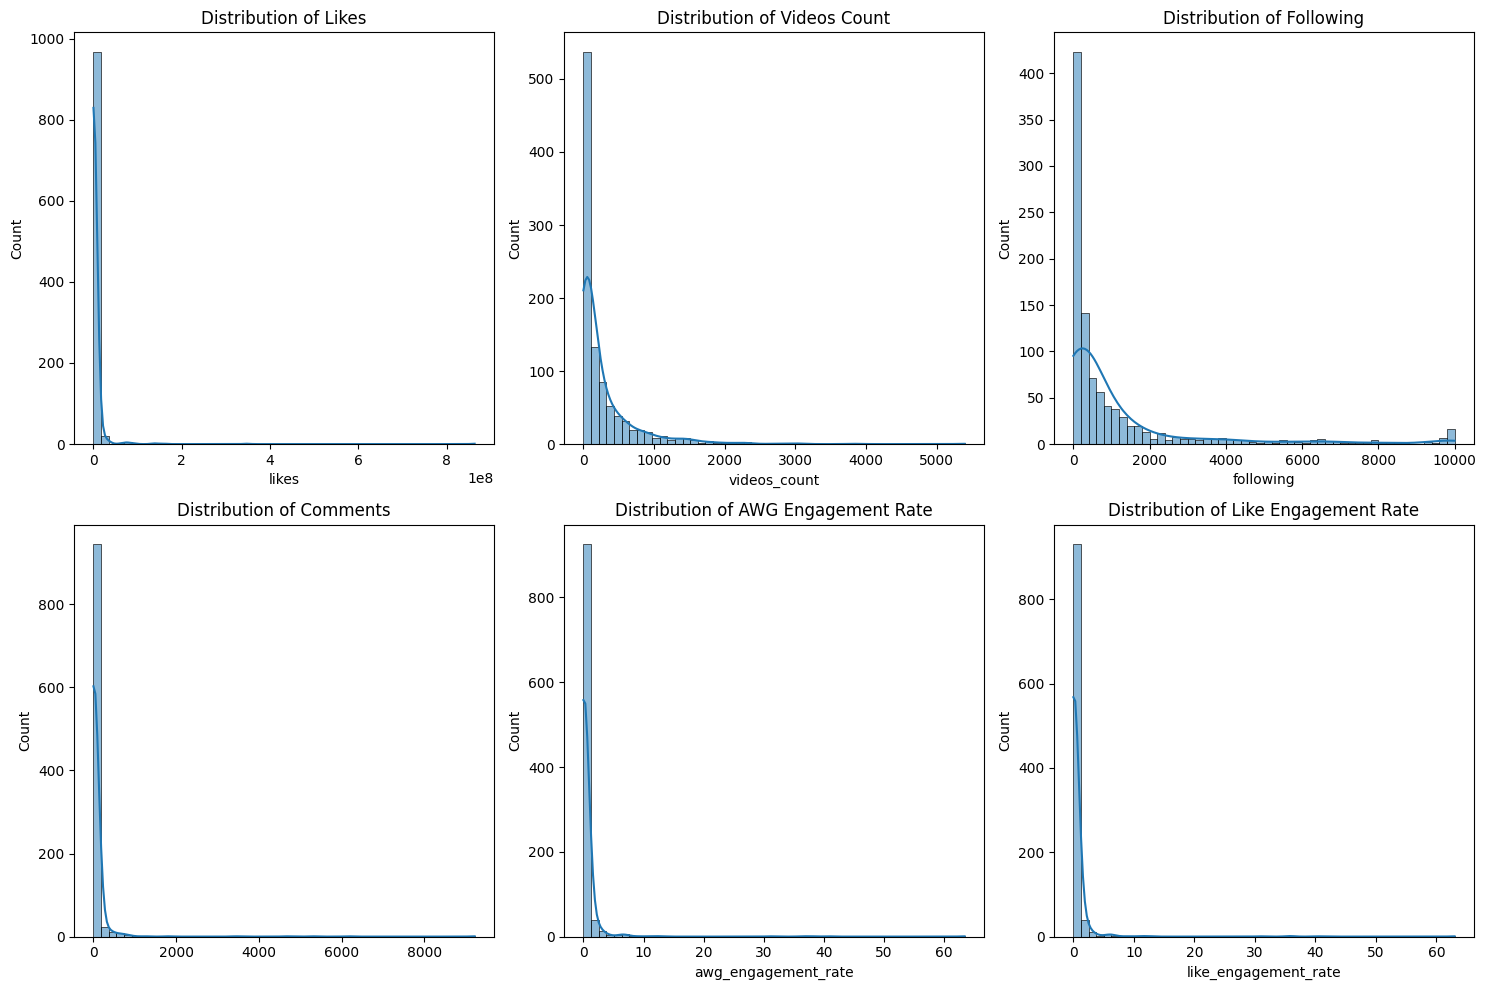

In [10]:
# Check the distribution of each feature
plt.figure(figsize=(15, 10))

# Likes distribution
plt.subplot(2, 3, 1)
sns.histplot(tiktok_data['likes'], bins=50, kde=True)
plt.title('Distribution of Likes')

# Videos count distribution
plt.subplot(2, 3, 2)
sns.histplot(tiktok_data['videos_count'], bins=50, kde=True)
plt.title('Distribution of Videos Count')

# Following distribution
plt.subplot(2, 3, 3)
sns.histplot(tiktok_data['following'], bins=50, kde=True)
plt.title('Distribution of Following')

# Comments distribution
plt.subplot(2, 3, 4)
sns.histplot(tiktok_data['comment_engagement_rate'] * tiktok_data['followers'], bins=50, kde=True)
plt.title('Distribution of Comments')

# AWG Engagement Rate distribution
plt.subplot(2, 3, 5)
sns.histplot(tiktok_data['awg_engagement_rate'], bins=50, kde=True)
plt.title('Distribution of AWG Engagement Rate')

# Like Engagement Rate distribution
plt.subplot(2, 3, 6)
sns.histplot(tiktok_data['like_engagement_rate'], bins=50, kde=True)
plt.title('Distribution of Like Engagement Rate')

plt.tight_layout()
plt.show()

Based on the histograms provided, it is clear that most features have highly skewed distributions. Applying a log transformation can help to normalize these distributions. 

### Data preprocessing

### 1. Log transform

In [11]:
# Log transform for skewed distributions (to normalize the distribution)
tiktok_data['log_likes'] = np.log1p(tiktok_data['likes']) if tiktok_data['likes'].skew() > 0.5 else tiktok_data['likes']
tiktok_data['log_videos_count'] = np.log1p(tiktok_data['videos_count']) if tiktok_data['videos_count'].skew() > 0.5 else tiktok_data['videos_count']
tiktok_data['log_following'] = np.log1p(tiktok_data['following']) if tiktok_data['following'].skew() > 0.5 else tiktok_data['following']
tiktok_data['log_comments'] = np.log1p(tiktok_data['comment_engagement_rate'] * tiktok_data['followers']) if (tiktok_data['comment_engagement_rate'] * tiktok_data['followers']).skew() > 0.5 else tiktok_data['comment_engagement_rate'] * tiktok_data['followers']
tiktok_data['log_awg_engagement_rate'] = np.log1p(tiktok_data['awg_engagement_rate']) if tiktok_data['awg_engagement_rate'].skew() > 0.5 else tiktok_data['awg_engagement_rate']
tiktok_data['log_like_engagement_rate'] = np.log1p(tiktok_data['like_engagement_rate']) if tiktok_data['like_engagement_rate'].skew() > 0.5 else tiktok_data['like_engagement_rate']

# Handle infinite values generated by log transformation
tiktok_data.replace([np.inf, -np.inf], np.nan, inplace=True)
tiktok_data.fillna(0, inplace=True)

C:\Users\flag8\AppData\Local\Temp\ipykernel_51904\2857030249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok_data['log_likes'] = np.log1p(tiktok_data['likes']) if tiktok_data['likes'].skew() > 0.5 else tiktok_data['likes']
C:\Users\flag8\AppData\Local\Temp\ipykernel_51904\2857030249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok_data['log_videos_count'] = np.log1p(tiktok_data['videos_count']) if tiktok_data['videos_count'].skew() > 0.5 else tiktok_data['videos_count']
C:\Users\flag8\A

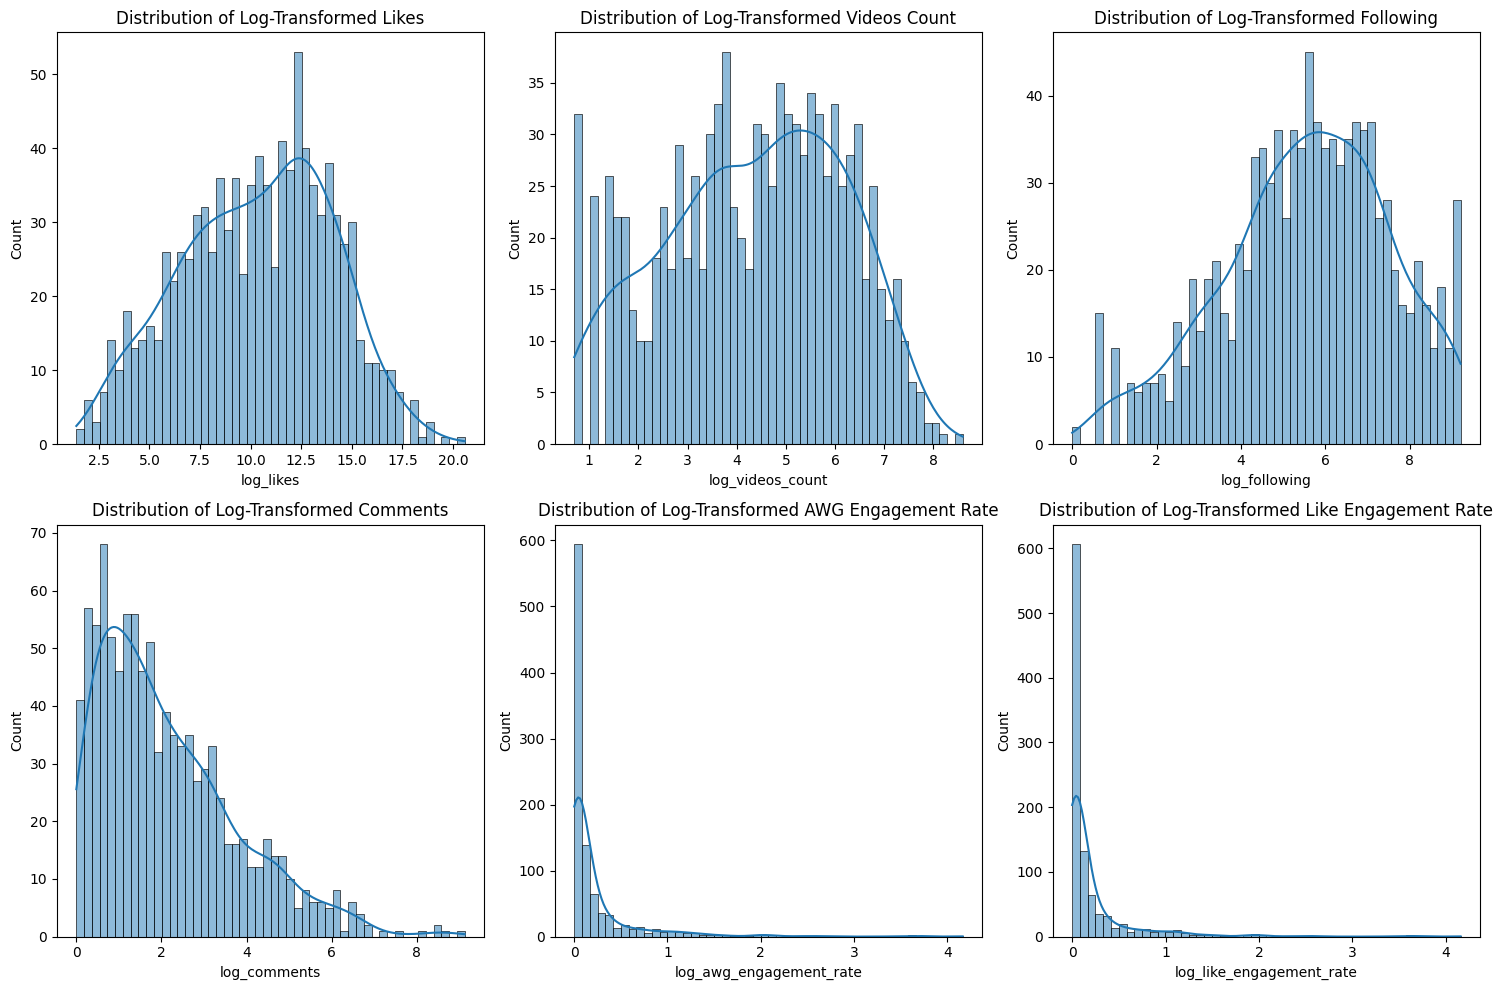

In [12]:
# Plotting the log-transformed features
plt.figure(figsize=(15, 10))

# Log-Transformed Likes distribution
plt.subplot(2, 3, 1)
sns.histplot(tiktok_data['log_likes'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Likes')

# Log-Transformed Videos Count distribution
plt.subplot(2, 3, 2)
sns.histplot(tiktok_data['log_videos_count'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Videos Count')

# Log-Transformed Following distribution
plt.subplot(2, 3, 3)
sns.histplot(tiktok_data['log_following'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Following')

# Log-Transformed Comments distribution
plt.subplot(2, 3, 4)
sns.histplot(tiktok_data['log_comments'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Comments')

# Log-Transformed AWG Engagement Rate distribution
plt.subplot(2, 3, 5)
sns.histplot(tiktok_data['log_awg_engagement_rate'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed AWG Engagement Rate')

# Log-Transformed Like Engagement Rate distribution
plt.subplot(2, 3, 6)
sns.histplot(tiktok_data['log_like_engagement_rate'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Like Engagement Rate')

plt.tight_layout()
plt.show()


### Feature Engineering

In [13]:
# Define trending status based on median number of followers
median_followers = tiktok_data['followers'].median()
tiktok_data['is_trending'] = tiktok_data['followers'] > median_followers

C:\Users\flag8\AppData\Local\Temp\ipykernel_51904\1062620400.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok_data['is_trending'] = tiktok_data['followers'] > median_followers


### Feature Selection

### 1. Correlation Analysis

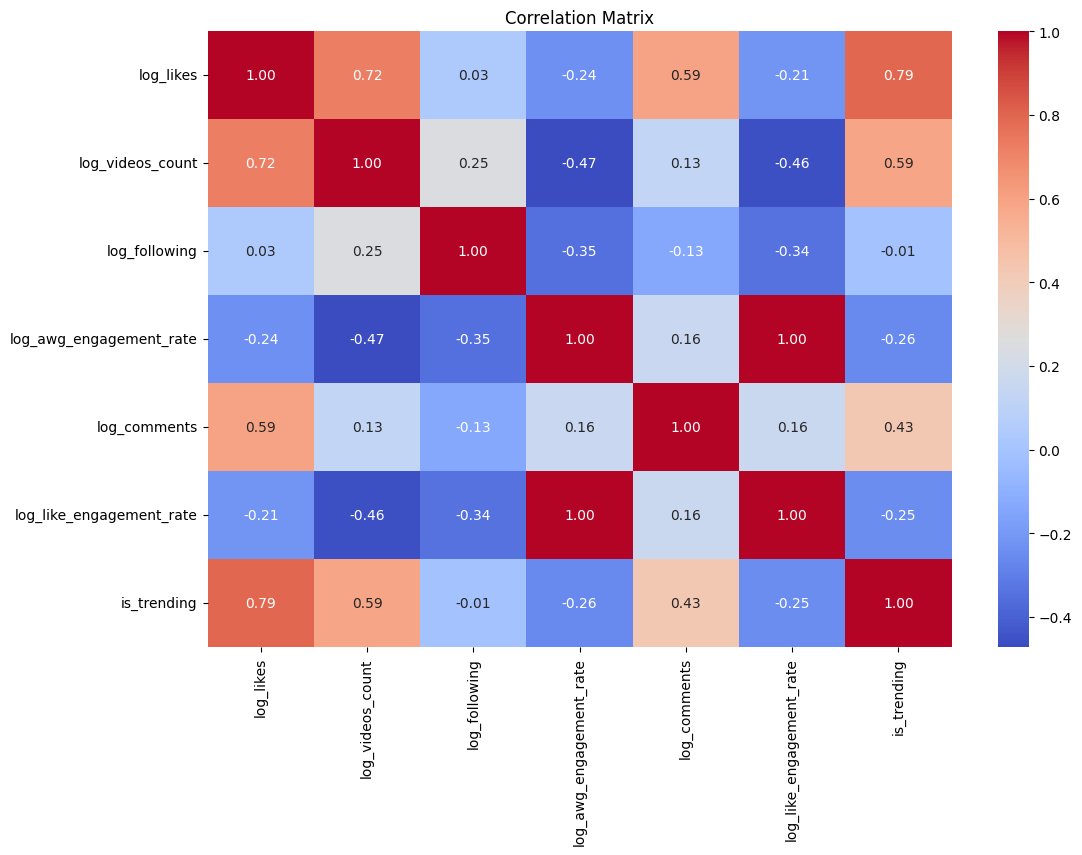

In [14]:
features = ['log_likes', 'log_videos_count', 'log_following', 'log_awg_engagement_rate', 'log_comments', 'log_like_engagement_rate', 'is_trending']
tiktok_data = tiktok_data[features]
plt.figure(figsize=(12, 8))
sns.heatmap(tiktok_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- High positive Correlation: log_likes(0.79), log_video_counts(0.59), and log_comments(0.43)
- moderate negative correlation: log_awg_engagement_rate(-0.26) and log_like_engagement_rate(-0.25)
- no significant correlation: log_following (-0.01)

Therefore, removed log_following variable in the dataset

In [15]:
features = ['log_likes', 'log_videos_count', 'log_awg_engagement_rate', 'log_comments', 'log_like_engagement_rate', 'is_trending']
tiktok_data = tiktok_data[features]

In [16]:
tiktok_data

,log_likes,log_videos_count,log_awg_engagement_rate,log_comments,log_like_engagement_rate,is_trending
0,7.369601,3.044522,0.048437,2.180417,0.044167,False
1,8.254269,5.420535,0.057629,0.933288,0.053506,False
2,10.085851,5.433722,0.001398,0.108214,0.001340,False
3,4.615121,1.791759,0.385104,0.182322,0.381935,False
4,4.844187,1.609438,0.115365,1.178655,0.108074,False
...,...,...,...,...,...,...
995,8.301273,4.709530,0.073613,1.683126,0.069346,False
996,4.624973,1.609438,0.380924,0.223144,0.377814,False
997,11.536652,4.499810,0.069698,2.573702,0.068764,True
998,9.814711,5.379897,0.071076,2.381722,0.067759,False


### Train-Test Split and Spliting

In [17]:
# Split the data into training and testing sets
features = ['log_likes', 'log_videos_count', 'log_comments', 'log_awg_engagement_rate', 'log_like_engagement_rate']
X = tiktok_data[features]
y = tiktok_data['is_trending']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Development and Training

- RandomForestClassifier

In [18]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Trending', 'Trending'], yticklabels=['Not Trending', 'Trending'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

Random Forest Classifier
              precision    recall  f1-score   support

       False       0.94      0.96      0.95        95
        True       0.96      0.94      0.95       105

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



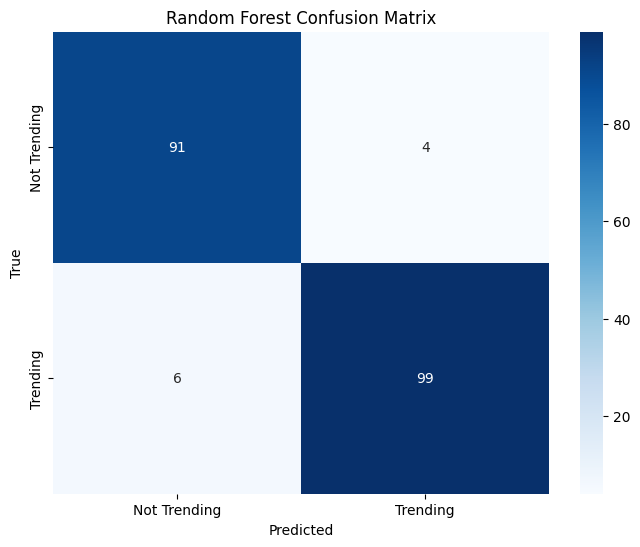

In [19]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Classifier")
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

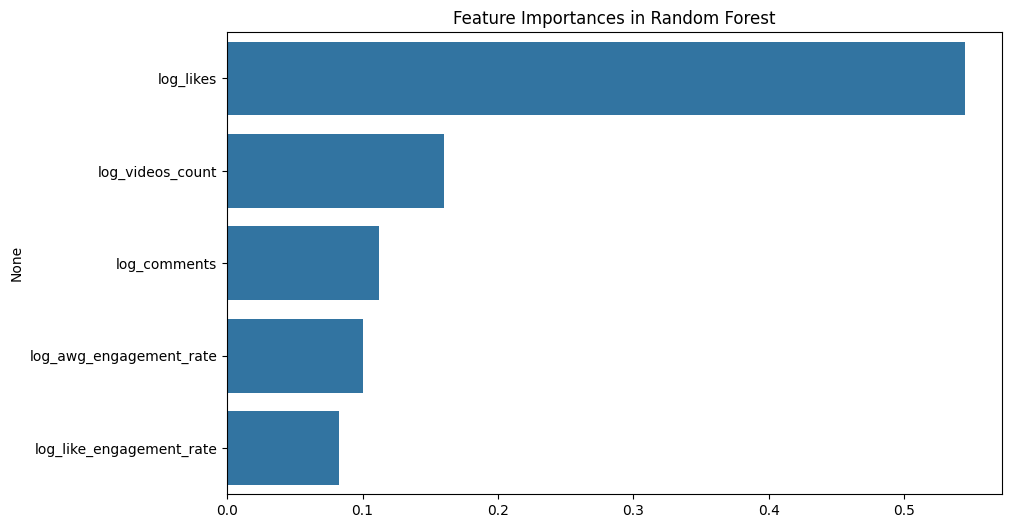

In [20]:
# Plotting Feature Importances for Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances in Random Forest')
plt.show()

- Logistic Regression

Logistic Regression
              precision    recall  f1-score   support

       False       0.93      0.97      0.95        95
        True       0.97      0.93      0.95       105

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



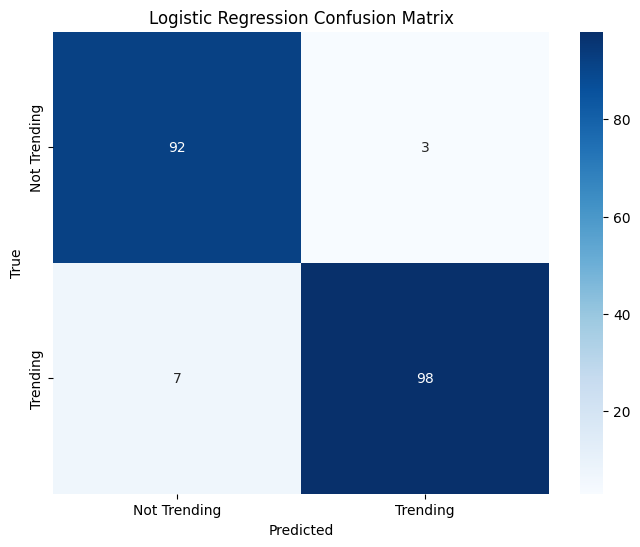

In [21]:
# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")

- Neural Network (NN)

Neural Network Classifier
              precision    recall  f1-score   support

       False       0.93      0.98      0.95        95
        True       0.98      0.93      0.96       105

    accuracy                           0.95       200
   macro avg       0.96      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



c:\Users\flag8\Work\CSCN8010\venv\tensorflow_cpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


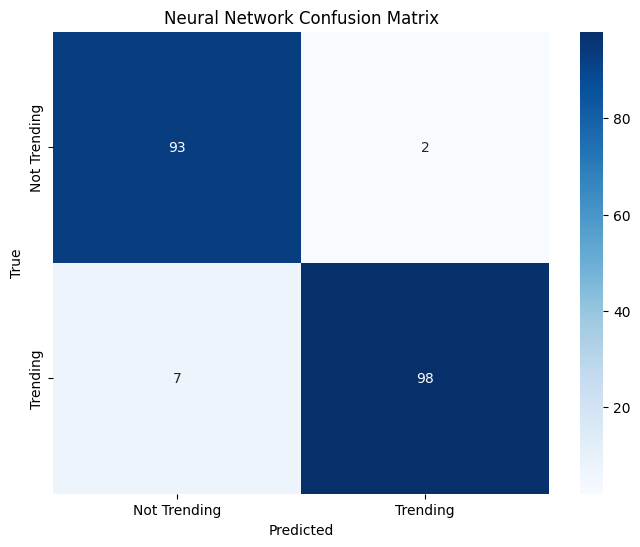

In [22]:
# Train Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
nn_model.fit(X_train, y_train)

# Predict
y_pred_nn = nn_model.predict(X_test)

# Evaluate
print("Neural Network Classifier")
print(classification_report(y_test, y_pred_nn))
plot_confusion_matrix(y_test, y_pred_nn, "Neural Network Confusion Matrix")

### Conclusion

Based on the evaluation metrics and the confusion metrices, we can conclude that all three models performed similarly well. Logistic Regression emerges as the most efficient choice due to its simplicity and interpretability.

- Logistic Regression for simplicity and interpretability.
- Random Forest for a balance of performance and interpretability.
- Neural Network for complex and large-scale problems where higher accuracy is needed with further tuning.